In [3]:
import matplotlib.pyplot as plt
from src.dataset import get_dataloaders

train_loader, test_loader = get_dataloaders(
    data_root="./data",
    batch_size=64,
    download=False
)

c:\Users\joaki\mlops25\github\MLramverk\ML_ramverk_labb1\.venv\Lib\site-packages\torchvision\datasets\cifar.py:83: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  entry = pickle.load(f, encoding="latin1")


# EDA

In [2]:
train_loader.dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: c:\Users\joaki\mlops25\github\MLramverk\ML_ramverk_labb1\data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
class_names = train_loader.dataset.classes

class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### See if the data is balanced

In [10]:
import pandas as pd

labels = []

for _, y in train_loader:
    labels.extend(y.tolist())

label_names = [class_names[i] for i in labels]

vc = pd.Series(label_names).value_counts().sort_index()
vc

airplane      5000
automobile    5000
bird          5000
cat           5000
deer          5000
dog           5000
frog          5000
horse         5000
ship          5000
truck         5000
Name: count, dtype: int64

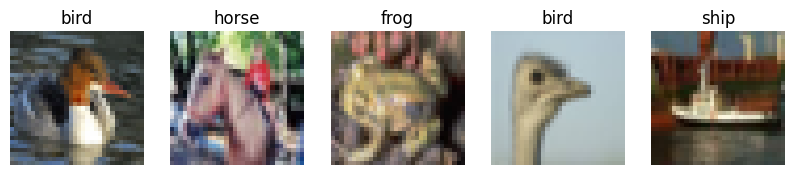

In [6]:
import matplotlib.pyplot as plt

x, y = next(iter(train_loader))

plt.figure(figsize=(10,5))

for i in range(5):
    plt.subplot(1,5,i+1)

    img = x[i].permute(1,2,0)

    plt.imshow(img, interpolation="nearest")
    plt.title(class_names[y[i].item()])
    plt.axis("off")

plt.show()

### Min/max

In [5]:
print("min/max:", x.min().item(), x.max().item())
print("mean/std:", x.mean().item(), x.std().item())

min/max: 0.0 1.0
mean/std: 0.4888119697570801 0.2568303644657135
